In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
# print(data.DESCR)
X=data.data
y=data.target

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

# Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_test)

In [5]:
from sklearn.metrics import r2_score, root_mean_squared_error
print('r2 score: ',r2_score(y_test,y_pred))
print('RMSE: ', root_mean_squared_error(y_test,y_pred))


r2 score:  0.5188113124539249
RMSE:  48.72713760953253


# Ridge Regularization

In [6]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)     # alpha = lambda
R.fit(X_train,y_train)
y_pred1 = R.predict(X_test)

In [7]:
print('r2 score: ',r2_score(y_test,y_pred1))
print('RMSE: ', root_mean_squared_error(y_test,y_pred1))

r2 score:  0.518973263588495
RMSE:  48.718937001819555


fdafs

In [8]:
m = 100
x1 = 5 * np.random.rand(m,1) - 2                        # generates values between [-2,3]
x2 = 0.7 * x1**2 - 2 * x1 + 3 + np.random.randn(m,1)    # np.random.randn(m,1) adds gaussian noise, mean=0, variance=1

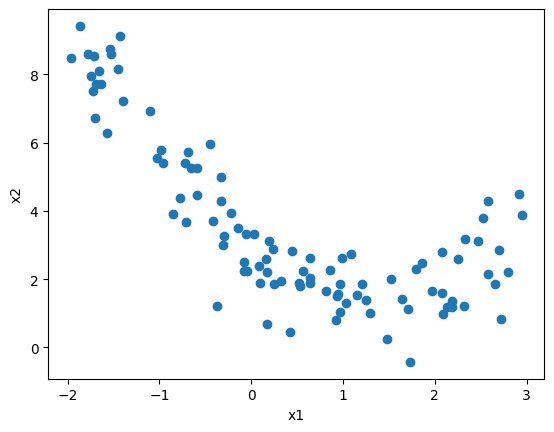

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x1,x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Ridge for different alphas

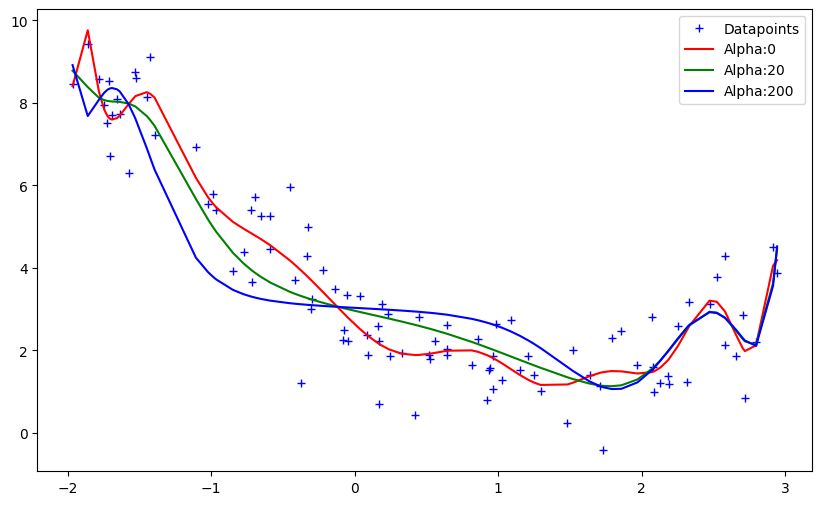

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
  model = Pipeline([
                  ('poly_feats', PolynomialFeatures(degree=16)),
                  ('ridge', Ridge(alpha=alpha))
                  ])
  model.fit(x1,x2)
  return model.predict(x1)

alphas = [0,20,200]
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha,c in zip(alphas,cs):
  preds = get_preds_ridge(x1,x2,alpha)
  plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])], c, label='Alpha:{}'.format(alpha))
plt.legend()
plt.show()